In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
df = pd.read_csv('/content/gdrive/MyDrive/df_tweets.csv')

In [14]:
# df = pd.read_pickle('df_tweets.pkl')
df.columns = df.columns.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118355 entries, 0 to 118354
Columns: 1636 entries, Unnamed: 0 to 999
dtypes: float64(635), int64(1001)
memory usage: 1.4 GB


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.95, random_state=42)

In [17]:
# get a smaller sample ~ 5.9K tweets
len(X_train)

5917

In [18]:
kmeans_clusters = []
for k in range(1, 16):
    kmeans_clusters.append(KMeans(n_clusters=k, max_iter=300).fit(X_train))

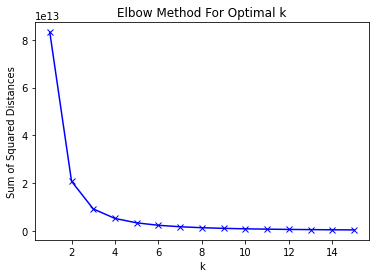

In [ ]:
# Elbow method to find optimal number of clusters
sse_ = []
for k in range(1, 16):
    kmeans = kmeans_clusters[k-1]
    sse_.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1], 'bx-');
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


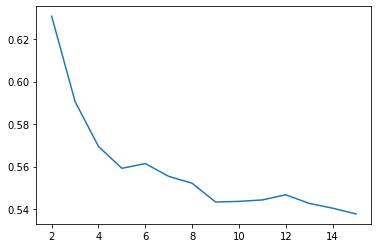

In [19]:
# Silhouette analysis to find optimal number of clusters
from sklearn.metrics import silhouette_samples, silhouette_score
ss = []
for k in range(2, 16):
    kmeans = kmeans_clusters[k-1]
    ss.append([k, silhouette_score(X_train, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

In [26]:
# use Mean Shift to find optimal number of clusters
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=len(X_train), random_state=42)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_train, labels))


number of estimated clusters : 6
Silhouette Coefficient: 0.551


In [29]:
# Fit a KMeans clustering model
kmeans = KMeans(n_clusters=6, max_iter=600)
kmeans.fit(X_train)

KMeans(max_iter=600, n_clusters=6)

In [31]:
print("Clusters: %0.3f" % len(kmeans.cluster_centers_))
print("Inertia_: %0.3f" % kmeans.inertia_)

# kmeans model performance metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_train, kmeans.labels_))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X_train, kmeans.labels_))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X_train, kmeans.labels_))

Clusters: 6.000
Inertia_: 188479105929.913
Silhouette Coefficient: 0.561
Calinski-Harabasz Index: 42563.410
Davies-Bouldin Index: 0.497
